In [1]:
!pip install kagglehub --target="C:\ProgramData\Anaconda3\Lib\site-packages"


  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/18/78/08cec00ea05fd2469f9395da0306bb368c4ed275693be8d31473eafaf90c/kagglehub-1.0.0-py3-none-any.whl.metadata
  Using cached kagglehub-1.0.0-py3-none-any.whl.metadata (40 kB)
  Obtaining dependency information for kagglesdk<1.0,>=0.1.14 from https://files.pythonhosted.org/packages/1c/d8/71a8b9115ed2cf8b487c8976e66678311e82c73980e103eda15623abd6a5/kagglesdk-0.1.15-py3-none-any.whl.metadata
  Using cached kagglesdk-0.1.15-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for packaging from https://files.pythonhosted.org/packages/b7/b9/c538f279a4e237a006a2c98387d081e9eb060d203d8ed34467cc0f0b9b53/packaging-26.0-py3-none-any.whl.metadata
  Using cached packaging-26.0-py3-none-any.whl.metadata (3.3 kB)
  Obtaining dependency information for pyyaml from https://files.pythonhosted.org/packages/da/e3/ea007450a105ae919a72393cb06f122f288ef60bba2dc64b26e2646fa315/pyyaml-6.0.3-cp311-cp311

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
botocore 1.29.76 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.6.3 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0.3 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.5 which is incompatible.
python-lsp-black 1.2.1 

In [2]:
import sys
# Tell Python to look in the folder where the terminal says kagglehub is installed
sys.path.append(r'C:\Users\temp.mits.091\AppData\Roaming\Python\Python311\site-packages')

import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Now the rest of your code should work!
path = kagglehub.dataset_download("yasserh/titanic-dataset")
df = pd.read_csv(os.path.join(path, "Titanic-Dataset.csv"))

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2)
print("Success! Data loaded and split.")


Success! Data loaded and split.


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabi

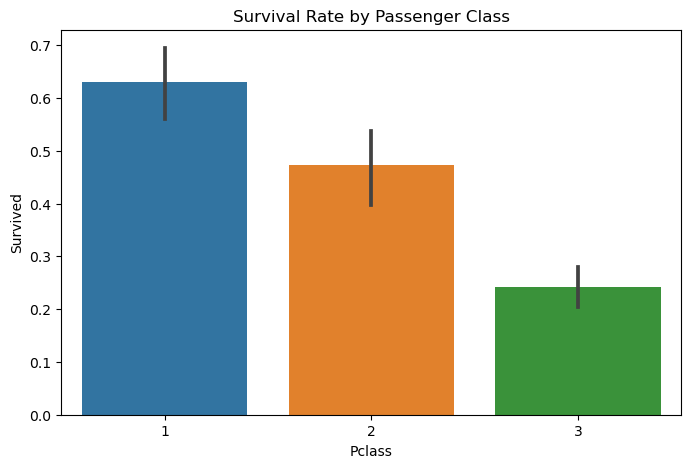

In [3]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Point to where kagglehub was installed (based on your previous error)
sys.path.append(r'C:\Users\temp.mits.091\AppData\Roaming\Python\Python311\site-packages')
import kagglehub

# 2. Download and Load the data
path = kagglehub.dataset_download("yasserh/titanic-dataset")
csv_path = os.path.join(path, "Titanic-Dataset.csv")
df = pd.read_csv(csv_path)

# 3. --- START ANALYSIS ---
print("--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Survival Rate by Gender ---")
print(df.groupby('Sex')['Survived'].mean())

# 4. Visualizing Survival by Class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Final training set shape: {X_train.shape}")


Final training set shape: (712, 11)


In [5]:
# 1. Fill Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 2. Convert Strings to Numbers
# Map Sex to 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encode Embarked (creates columns for C, Q, S)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 3. Drop useless columns
# Cabin has too many missing values; Name/Ticket/PassengerId are unique IDs
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# 4. Re-split the now-clean data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data is now clean and numeric!")
print(X_train.head())


Data is now clean and numeric!
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
331       1    0  45.5      0      0  28.5000       False        True
733       2    0  23.0      0      0  13.0000       False        True
382       3    0  32.0      0      0   7.9250       False        True
704       3    0  26.0      1      0   7.8542       False        True
813       3    1   6.0      4      2  31.2750       False        True


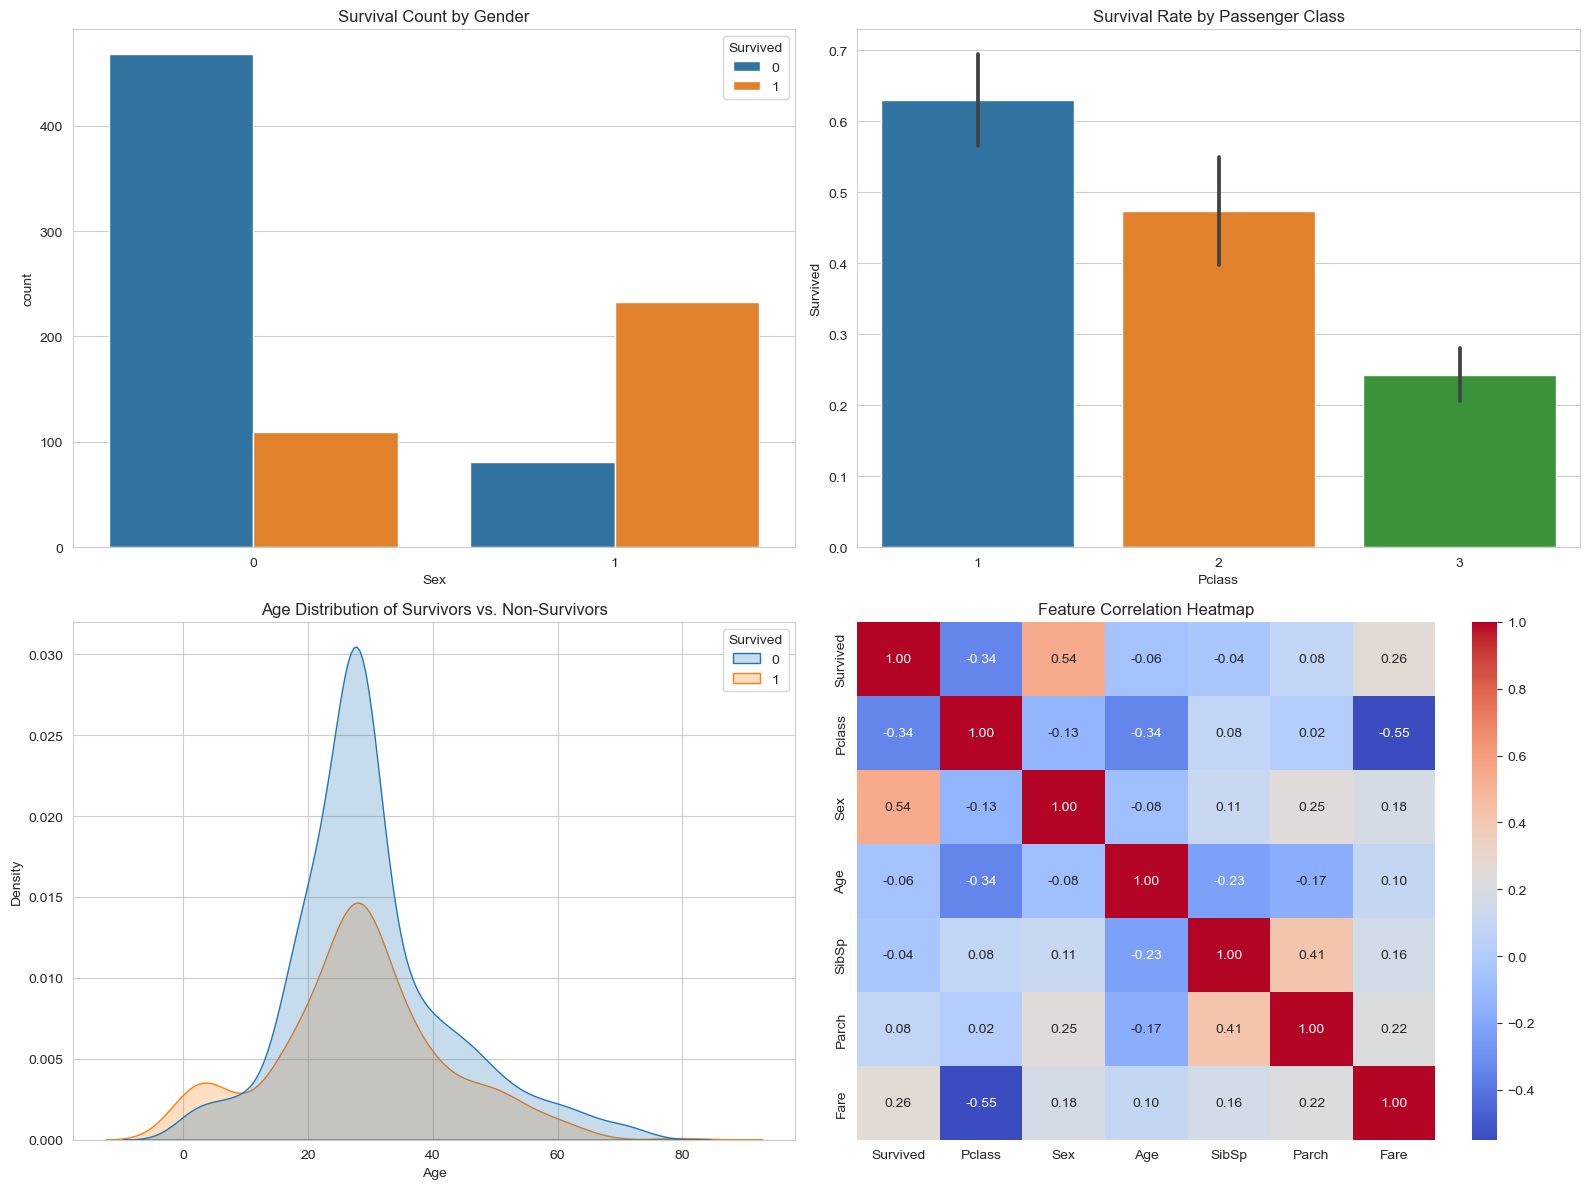

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure we only use numeric data for the heatmap
numeric_df = df.select_dtypes(include=['number'])

# Set the visual style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 2. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count by Gender')

# 3. Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Passenger Class')

# 4. Age Distribution
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution of Survivors vs. Non-Survivors')

# 5. Correlation Heatmap (The fix is here)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()
